In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


K11a1.png


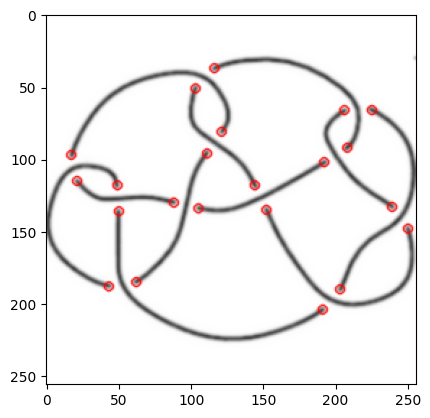

K11a10.png


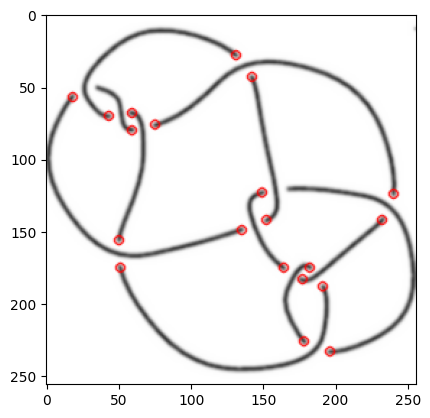

K11a100.png


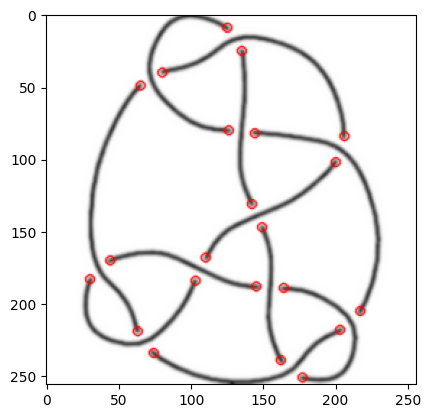

K11a101.png


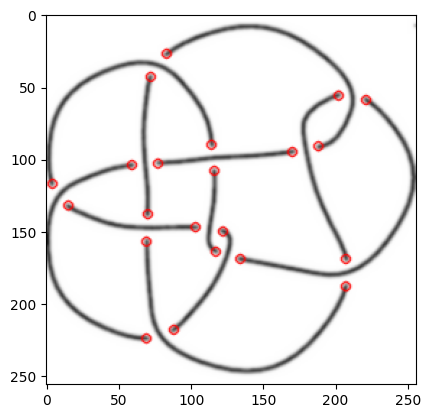

K11a102.png


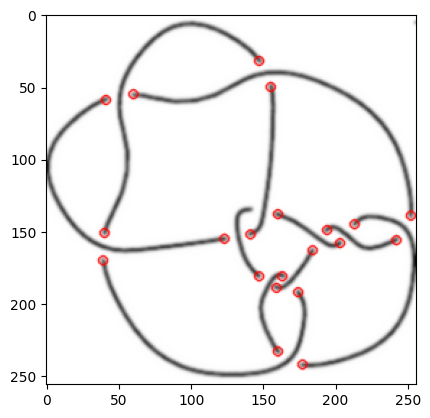

K11a103.png


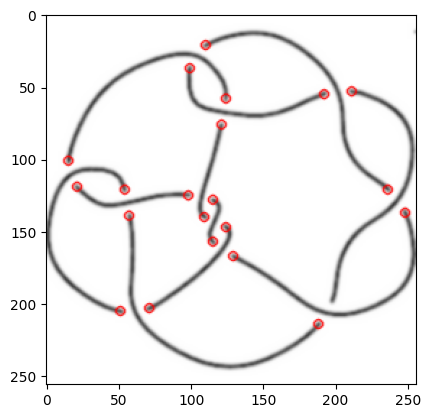

K11a104.png


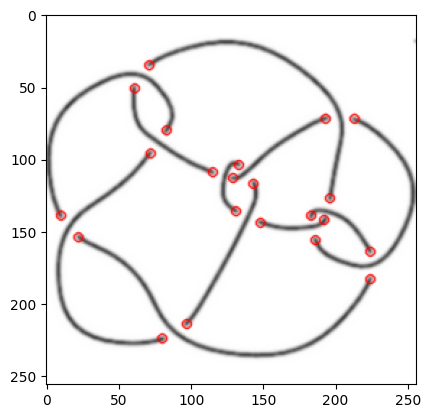

K11a105.png


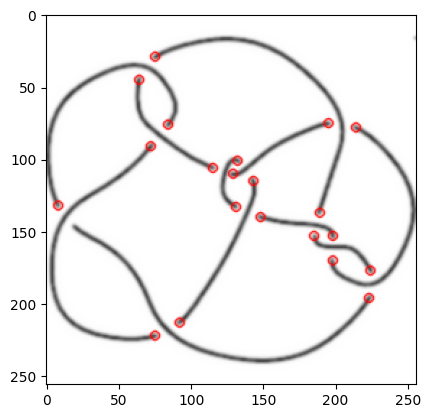

K11a106.png


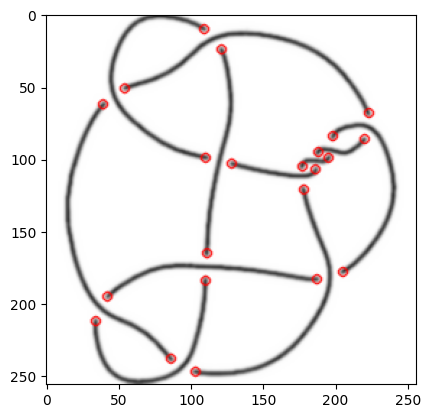

K11a107.png


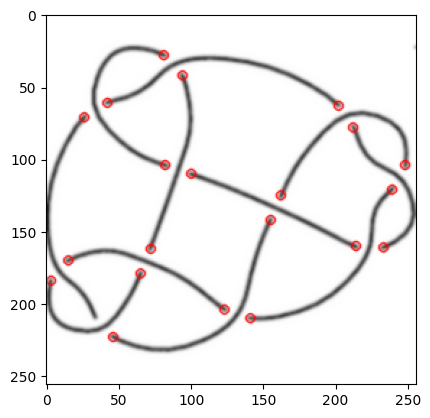

K11a108.png


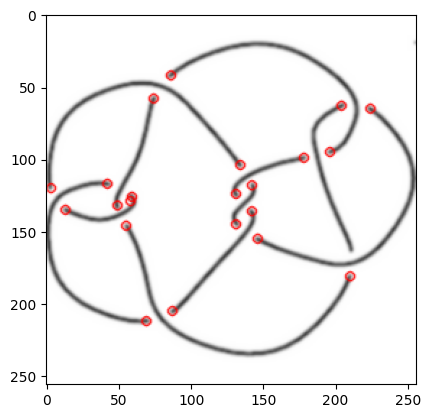

K11a109.png


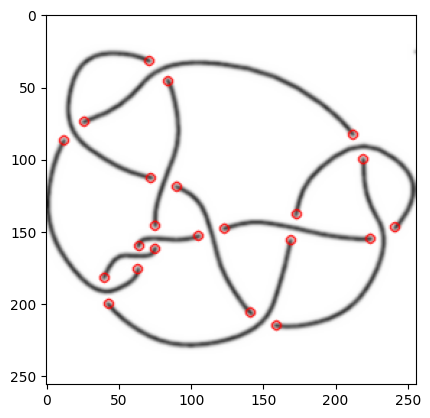

K11a11.png


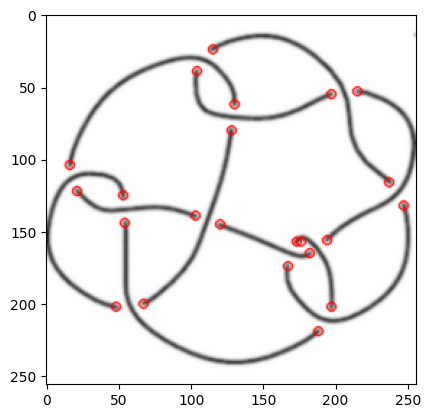

K11a110.png


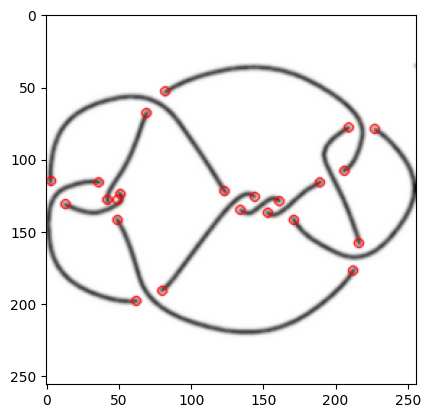

K11a111.png


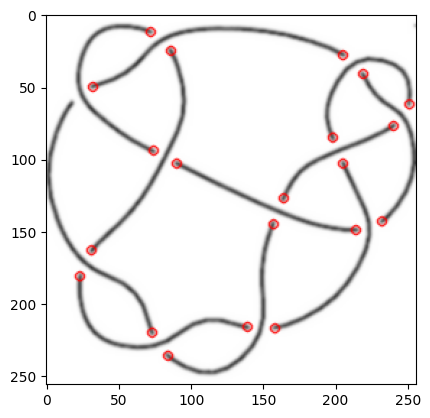

K11a112.png


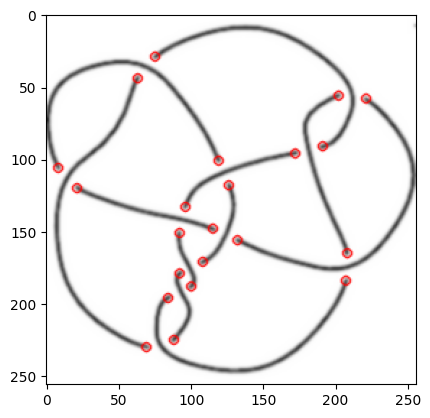

K11a113.png


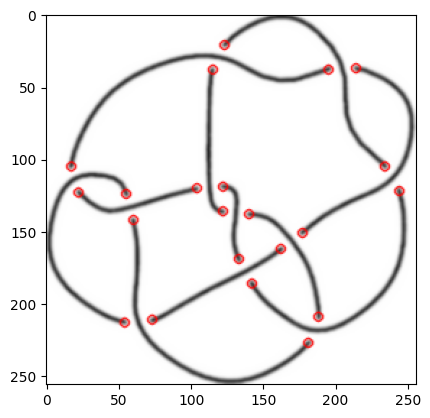

K11a114.png


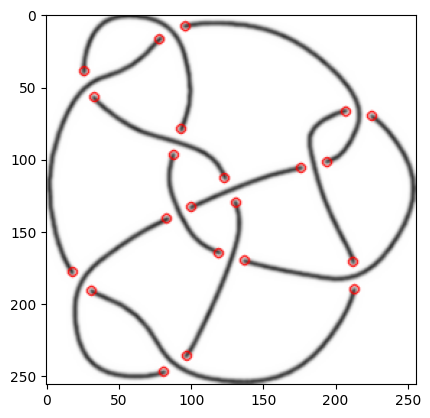

K11a115.png


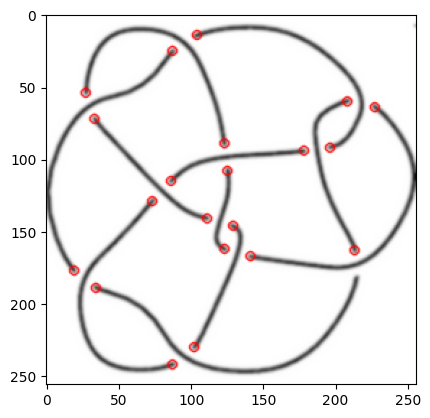

K11a116.png


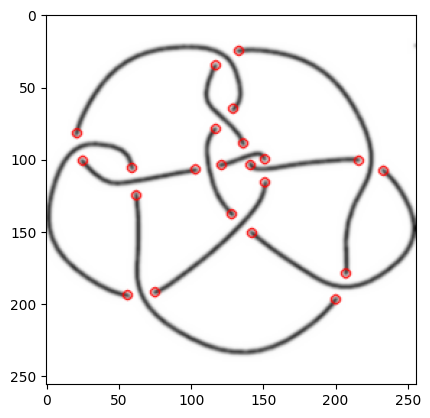

K11a117.png


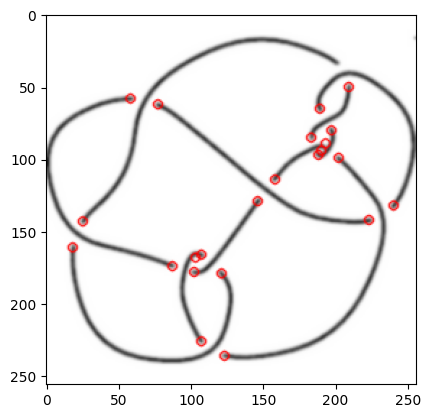

K11a118.png


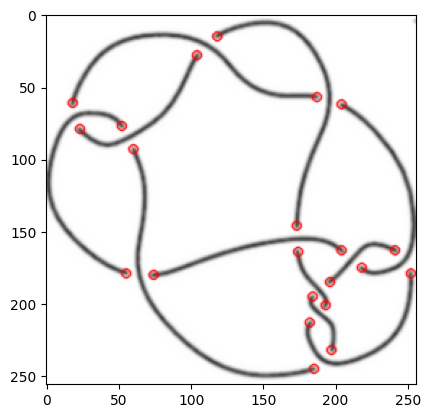

K11a119.png


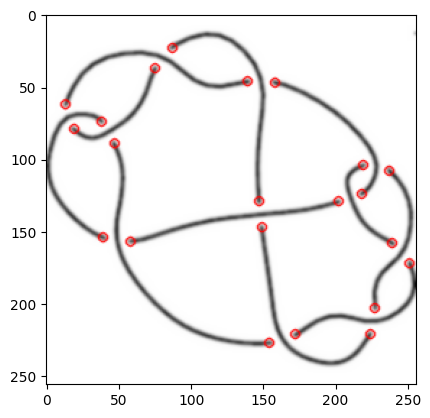

K11a12.png


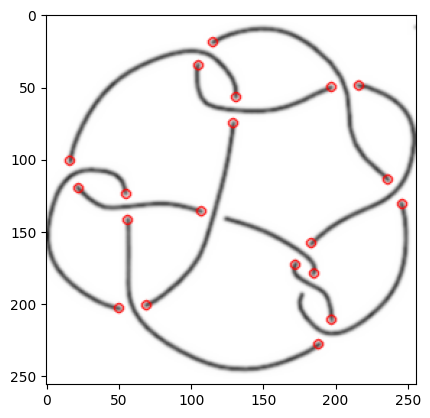

K11a120.png


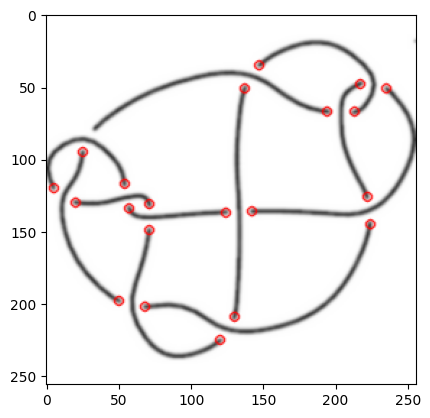

K11a121.png


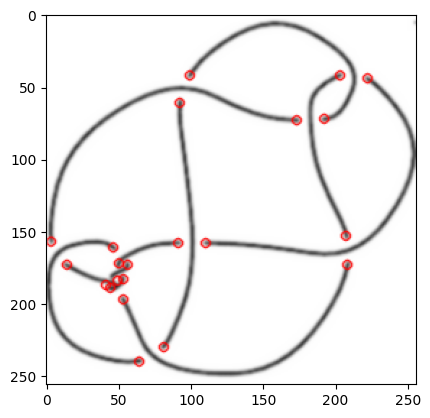

K11a122.png


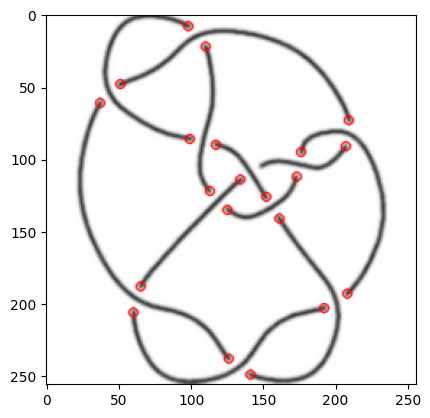

K11a123.png


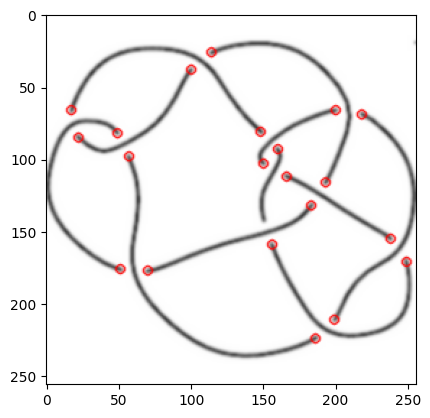

K11a124.png


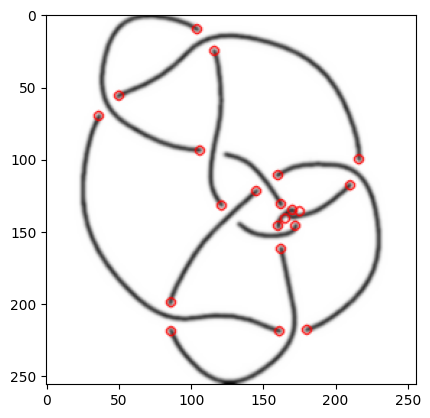

K11a125.png


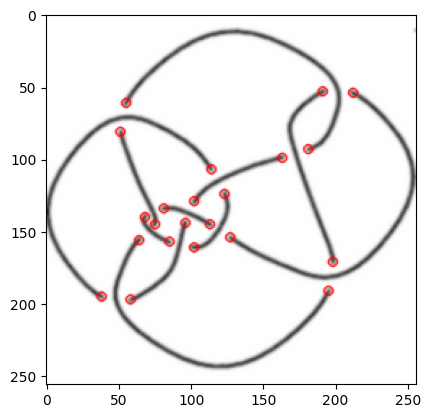

In [297]:
from scipy.ndimage import gaussian_filter
for i,f in enumerate(os.scandir("./data/gif/")):
    img=np.array(Image.open(f.path))
    for w in range(img.shape[0]):
        for h in range(img.shape[1]):
            if img[w][h]<4:
                img[w][h]=0
            else:
                img[w][h]=(img[w][h]-1)*(255/7.0)
    img=cv2.resize(img,(256,256))
    cv2.imwrite("./data/png/{}.png".format(f.name.split(".")[0]),img)
    break
for i,f in enumerate(os.scandir("./data/png")):
    if i==30:
        break
    img=cv2.imread(f.path)
    img=gaussian_filter(img,1)#ぼかすと検出されやすい
    print(f.name)
    fast=cv2.FastFeatureDetector_create(threshold=80)
    kp=fast.detect(img,None)
    img2=cv2.drawKeypoints(img,kp,None,color=(255,0,0))
    plt.imshow(img2,cmap="gray")
    plt.show()